In [1]:
import numpy as np
import matplotlib.pyplot as plt

Q1

In [2]:
def normalized_hist(img):
    n = img.shape[0] * img.shape[1]
    bins = {}
    # Count the number of occurrences of each pixel value
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] not in bins:
                bins[img[i, j]] = 1
            else:
                bins[img[i, j]] += 1
    # Normalize the histogram
    for key in bins:
        bins[key] /= n
    return bins

In [3]:
def load_image(filename):
    img = plt.imread(filename)
    return img

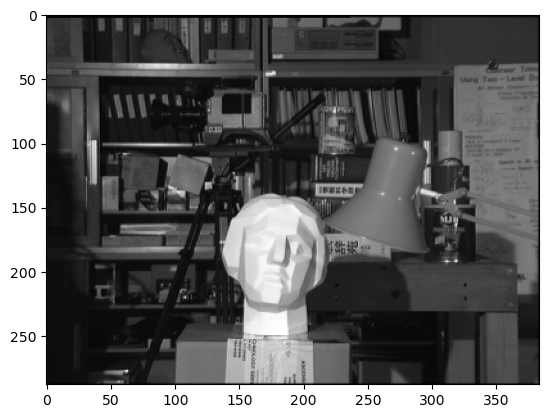

In [4]:
img1 = load_image('left.png')
plt.imshow(img1, cmap='gray')

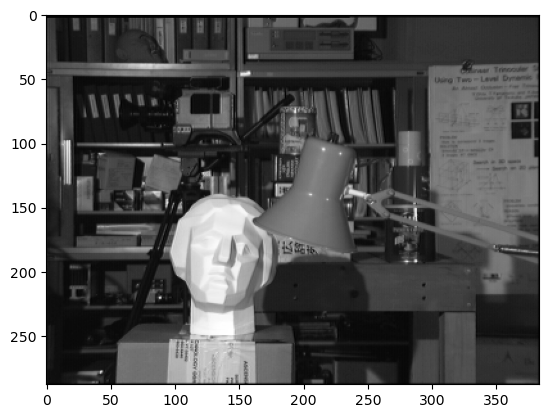

In [5]:
img2 = load_image('right.png')
plt.imshow(img2, cmap='gray')

In [6]:
norm_hist1 = normalized_hist(img1)
norm_hist2 = normalized_hist(img2)

In [7]:
def entropy(pmf):
    # Check if any probability is zero and exclude it from the calculation
    pmf = np.array(pmf)
    pmf = pmf[pmf > 0]
    
    # Calculate entropy
    entropy_value = 0
    for p in pmf:
        entropy_value -= p * np.log2(p)
    return entropy_value

In [8]:
def KL_divergence(p, q):  
    s = 0
    for i in range(len(p)):
        s += p[i] * np.log2(p[i] / q[i])
    return s

a)

In [9]:
def cross_entropy(p, q):
    ce = entropy(p) + KL_divergence(p, q)
    return ce

In [10]:
ce_left_right = cross_entropy(list(norm_hist1.values()), list(norm_hist2.values()))
ce_right_left = cross_entropy(list(norm_hist2.values()), list(norm_hist1.values()))
print("Cross entropy for (left, right):", ce_left_right)
print("Cross entropy for (right, left):", ce_right_left)

Cross entropy for (left, right): 7.583445033681561
Cross entropy for (right, left): 7.594832018487913


b)

In [11]:
r = 0.3
p = [r, 1 - r]

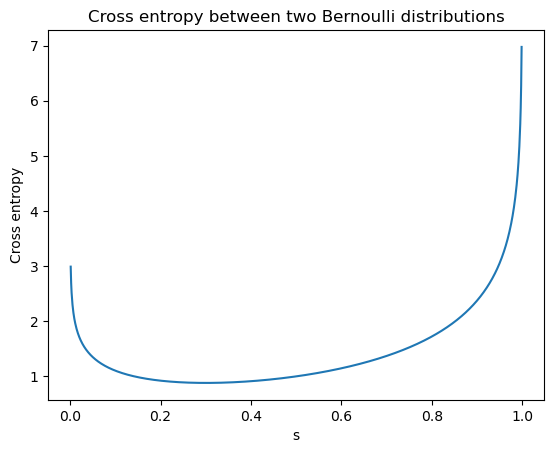

In [12]:
s = np.arange(0.001, 1, 0.001)
cross_entropy_values = [cross_entropy(p, [s[i], 1 - s[i]]) for i in range(len(s))]
plt.plot(s, cross_entropy_values)
plt.xlabel('s')
plt.ylabel('Cross entropy')
plt.title('Cross entropy between two Bernoulli distributions')
plt.show()

From the plot it can be seen that cross entropy value is minimum at point between 0.2 and 0.4. So, the answer is 0.3. Thus minimizing the cross entropy loss function gives us matching PMFs.

In [13]:
min_ce_s = -1
min_ce = float('inf')
for i in range(len(s)):
    if cross_entropy_values[i] < min_ce:
        min_ce = cross_entropy_values[i]
        min_ce_s = s[i]
print("Cross entropy is minimized at s =", min_ce_s)

Cross entropy is minimized at s = 0.3


The above calculation verifies that the cross entropy loss function is minimized when both PMFs are equal.

b)

In [14]:
def jensen_shannon_divergence(p, q):
    m = [(p[i] + q[i]) / 2 for i in range(len(p))]
    jsd = (cross_entropy(p, m) + cross_entropy(q, m)) / 2
    return jsd

In [15]:
jensen_shannon_divergence_left_right = jensen_shannon_divergence(list(norm_hist1.values()), list(norm_hist2.values()))
jensen_shannon_divergence_right_left = jensen_shannon_divergence(list(norm_hist2.values()), list(norm_hist1.values()))
print("Jensen-Shannon divergence for (left, right):", jensen_shannon_divergence_left_right)
print("Jensen-Shannon divergence for (right, left):", jensen_shannon_divergence_right_left)

Jensen-Shannon divergence for (left, right): 7.341037374968666
Jensen-Shannon divergence for (right, left): 7.341037374968666


In [16]:
kl_divergence_left_right = KL_divergence(list(norm_hist1.values()), list(norm_hist2.values()))
kl_divergence_right_left = KL_divergence(list(norm_hist2.values()), list(norm_hist1.values()))
print("KL divergence for (left, right):", kl_divergence_left_right)
print("KL divergence for (right, left):", kl_divergence_right_left)

KL divergence for (left, right): 0.32515092893162284
KL divergence for (right, left): 0.3162064867917893


From the above calculations, it can be seen that the Jensen-Shannon divergence is symmetric while KL divergence is not.

c)

In [17]:
def marginal_pmf(joint_pmf, index):
    """
    index = 0: calculate p(x)
    index = 1: calculate p(y)
    """

    marginal_pmf = {}
    for key in joint_pmf:
        if index == 0:
            if key[0] not in marginal_pmf:
                marginal_pmf[key[0]] = joint_pmf[key]
            else:
                marginal_pmf[key[0]] += joint_pmf[key]
        else:
            if key[1] not in marginal_pmf:
                marginal_pmf[key[1]] = joint_pmf[key]
            else:
                marginal_pmf[key[1]] += joint_pmf[key]
    
    return marginal_pmf

In [18]:
def check_joint_distribution(p_XY, r_X, s_Y):
    marginal_pmf_X = marginal_pmf(p_XY, 0)
    marginal_pmf_Y = marginal_pmf(p_XY, 1)
    # Check if the marginal distributions belong to Π(r,s), i.e., the marginal distributions obtained from the joint distribution p_XY
    # should be equal to r_X and s_Y
    flag = True
    for key in marginal_pmf_X:
        if abs(marginal_pmf_X[key] - r_X[key]) > 1e-10:
            flag = False
            break
    for key in marginal_pmf_Y:
        if abs(marginal_pmf_Y[key] - s_Y[key]) > 1e-10:
            flag = False
            break
    return flag


# Positive example
p_XY = {(0, 0): 0.1, (0, 1): 0.2, (1, 0): 0.3, (1, 1): 0.4}
r_X = {0: 0.3, 1: 0.7}
s_Y = {0: 0.4, 1: 0.6}
print("Positive example:", check_joint_distribution(p_XY, r_X, s_Y))

# Negative example
p_XY_neg = {(0, 0): 0.2, (0, 1): 0.1, (1, 0): 0.3, (1, 1): 0.4}
r_X = {0: 0.3, 1: 0.7}
s_Y = {0: 0.4, 1: 0.6}
print("Negative example:", check_joint_distribution(p_XY_neg, r_X, s_Y))


Positive example: True
Negative example: False


<br>
Q2

a)

(i)  
The crowding problem occurs when projecting high-dimensional data into a lower-dimensional space (like reducing a ten-dimensional manifold to two dimensions). In higher dimensions, the available volume grows much faster, so there's not enough space in the lower-dimensional map to accurately represent moderately distant points. As a result, these points are placed too far apart, while nearby points are modeled correctly. This distorts the data representation and compresses points in the center, preventing clear separation between clusters.  
<br>
(ii)  
The use of the Student t-distribution in the low-dimensional embedding space (as in t-SNE) helps address the crowding problem by assigning heavy tails to the probability distribution. This heavy-tailed distribution allows points that are moderately far apart in the high-dimensional space to still exert a non-negligible influence in the low-dimensional space.  
<br>
(iii)  
a) Symmetric SNE: Has a simpler for of gradient, so easy and faster to compute.  
b) t-SNE: Uses a Student t-distribution which has heavier tails and helps in reducing the crowding problem.  
c) Early exaggeration: t-SNE uses early exaggeration to increase the distance between clusters in the low-dimensional space.

b)

In [19]:
def pairwise_distances(X):
    n = X.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i][j] = np.sum((X[i] - X[j]) ** 2)
    return distances

In [20]:
def perplexity(p):
    H = 0
    for i in range(len(p)):
        H -= p[i] * np.log2(p[i])
    return 2 ** H

In [21]:
def find_optimal_sigmas(X, target_perplexity):
    n = X.shape[0]
    distances = pairwise_distances(X)
    sigmas = np.zeros(n)

    for i in range(n):
        # Binary search for the optimal sigma
        low = 1e-10
        high = 1000
        mid = (low + high) / 2
        max_iter = 50
        while max_iter:
            p = np.exp(-distances[i] / (2 * mid ** 2))
            p[0] = 0
            p += 1e-8
            p = p / np.sum(p)
            perp = perplexity(p)
            if abs(perp - target_perplexity) < 1e-10:
                break
            if perp > target_perplexity:
                high = mid
            else:
                low = mid
            mid = (low + high) / 2
            max_iter -= 1
        sigmas[i] = mid

    return sigmas

In [22]:
def high_dimensional_affinities(X, sigmas):
    n = X.shape[0]
    distances = pairwise_distances(X)
    P = np.zeros((n, n))

    for i in range(n):
        denominator = 1e-10 # to prevent division by zero
        for j in range(n):
            if i != j:
                denominator += np.exp(-distances[i][j] / (2 * sigmas[i] ** 2))
        for j in range(n):
            if i != j:
                P[i][j] = np.exp(-distances[i][j] / (2 * sigmas[i] ** 2)) / denominator
    P = (P + P.T) / (2 * n)

    return P

In [23]:
def low_dimensional_affinities(Y):
    n = Y.shape[0]
    distances = pairwise_distances(Y)
    Q = np.zeros((n, n))
    denominator = 0
    
    for i in range(n):
        for j in range(n):
            if i != j:
                denominator += 1 / (1 + distances[i][j])
    for i in range(n):
        for j in range(n):
            if i != j:
                Q[i][j] = 1 / (1 + distances[i][j]) / denominator
    
    return Q

In [25]:
def gradient(P, Q, Y):
    n = Y.shape[0]
    d = Y.shape[1]
    grad = np.zeros((n, d))
    for i in range(n):
        for j in range(n):
            grad[i] += 4 * (P[i][j] - Q[i][j]) * (Y[i] - Y[j]) * (1 / (1 + np.sum((Y[i] - Y[j]) ** 2)))
    return grad

In [26]:
def plot_points(Y, title=None):
    n = Y.shape[0]//2
    plt.figure()
    plt.scatter(Y[:n, 0], Y[:n, 1], color='red')
    plt.scatter(Y[n:, 0], Y[n:, 1], color='blue')
    if title:
        plt.title(title)
    plt.show()

In [27]:
def joint_KL_divergence(P, Q):
    n = P.shape[0]
    kl_div = 0
    for i in range(n):
        for j in range(n):
            if P[i][j] > 0 and Q[i][j] > 0:
                kl_div += P[i][j] * np.log2(P[i][j] / Q[i][j])
    return kl_div

In [28]:
def tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity = None, sigmas = None):
    n = X.shape[0]
    if sigmas is None:
        sigmas = find_optimal_sigmas(X, target_perplexity)

    P = high_dimensional_affinities(X, sigmas)

    Y = []
    np.random.seed(0)
    Y.append(np.random.normal(0, 1e-4, (n, low_dim)))
    Y.append(np.random.normal(0, 1e-4, (n, low_dim)))

    plot_points(Y[-1], 'Points in the low-dimensional space before t-SNE')
    print("Initial KL divergence:", joint_KL_divergence(P, low_dimensional_affinities(Y[-1])))

    for t in range(T):
        Q = low_dimensional_affinities(Y[-1])
        grad = gradient(P, Q, Y[-1])
        new_y = Y[-1] - learning_rate * grad + alpha * (Y[-1] - Y[-2])
        Y.append(new_y)

    plot_points(Y[-1], 'Points in the low-dimensional space after t-SNE')
    print("Final KL divergence:", joint_KL_divergence(P, low_dimensional_affinities(Y[-1])))

    return Y[-1]

In [29]:
mu1 = np.ones(10)
mu2 = 10 * np.ones(10)
cov = 0.01 * np.eye(10)
n = 10

np.random.seed(0)
cluster1 = np.random.multivariate_normal(mu1, cov, size=n)
cluster2 = np.random.multivariate_normal(mu2, cov, size=n)
X = np.concatenate((cluster1, cluster2))

low_dim = 2
T = 50

Effect of learning rate:

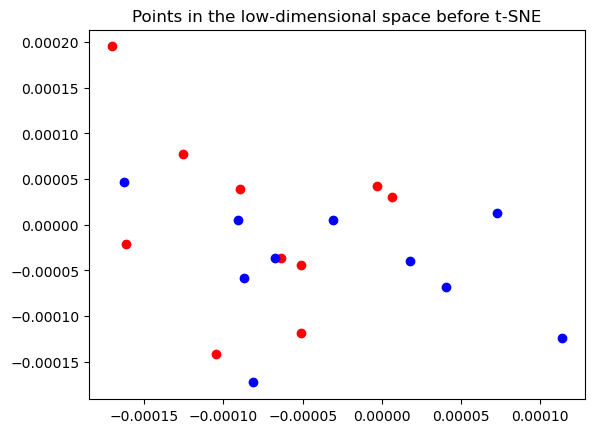

Initial KL divergence: 1.3957062312516166


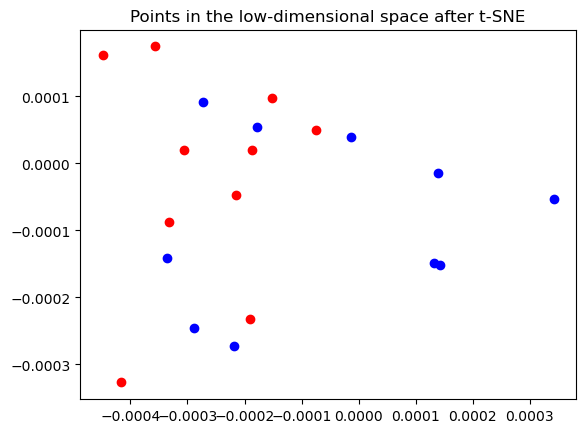

Final KL divergence: 1.395706194963367


In [30]:
learning_rate = 0.01
alpha = 0.5
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

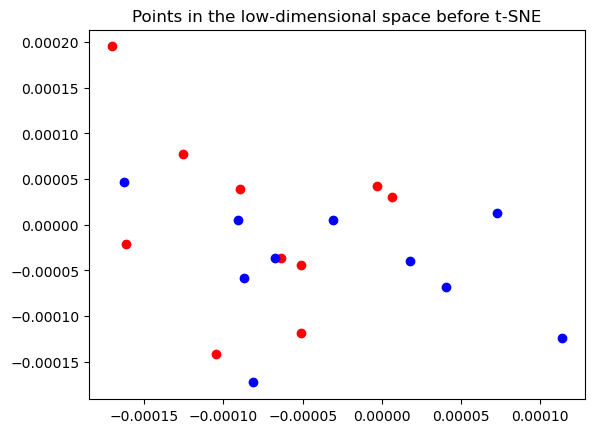

Initial KL divergence: 1.3957062312516166


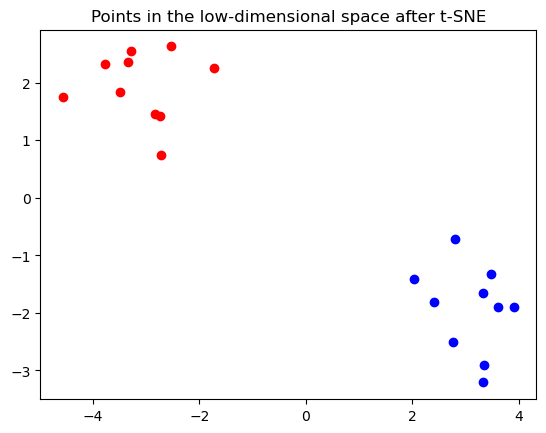

Final KL divergence: 0.15835540911744087


In [31]:
learning_rate = 10
alpha = 0.5
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

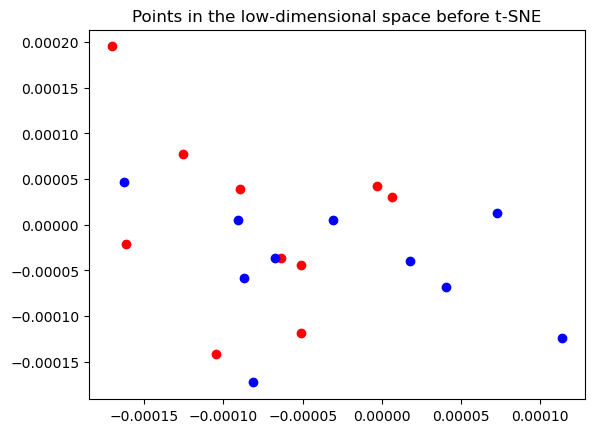

Initial KL divergence: 1.3957062312516166


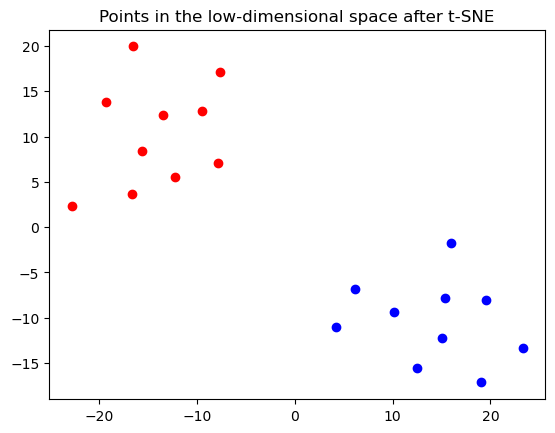

Final KL divergence: 0.3055961092520043


In [32]:
learning_rate = 100
alpha = 0.5
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

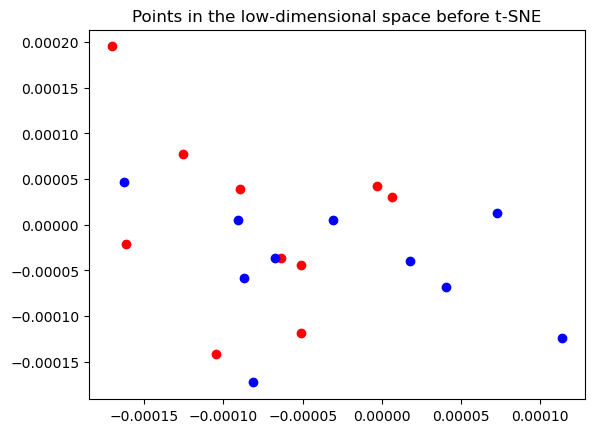

Initial KL divergence: 1.3957062312516166


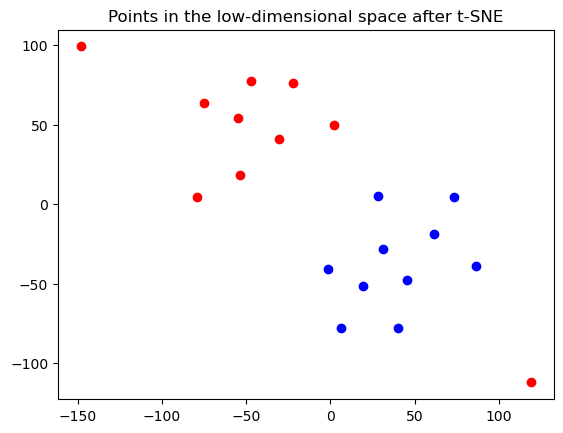

Final KL divergence: 0.8692931791156366


In [33]:
learning_rate = 500
alpha = 0.5
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

For very small learning rates, the algorithm does not converge in $T = 50$ iterations. This is because the learning rate is too small to make significant updates to the initial vectors.  
For very large learning rates, the algorithm converges to a suboptimal solution and points are spread out.  
KL divergence is minimized for mid-range learning rates.

Effect of alpha:

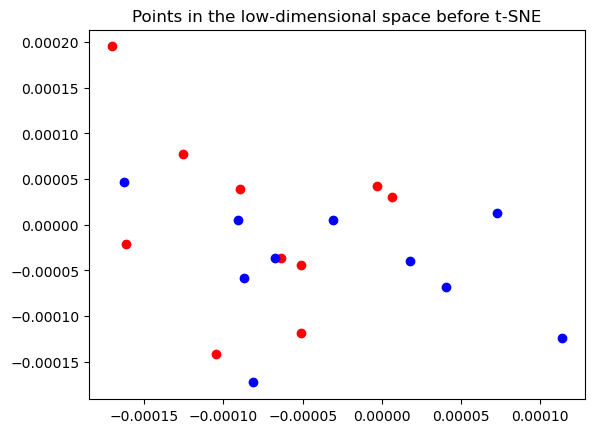

Initial KL divergence: 1.3957062312516166


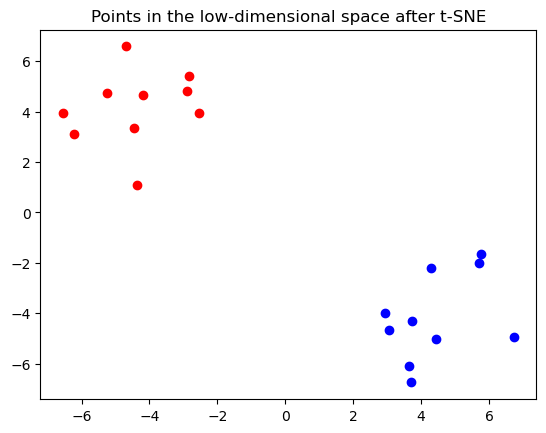

Final KL divergence: 0.46743955297445383


In [34]:
learning_rate = 50
alpha = 0.05
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

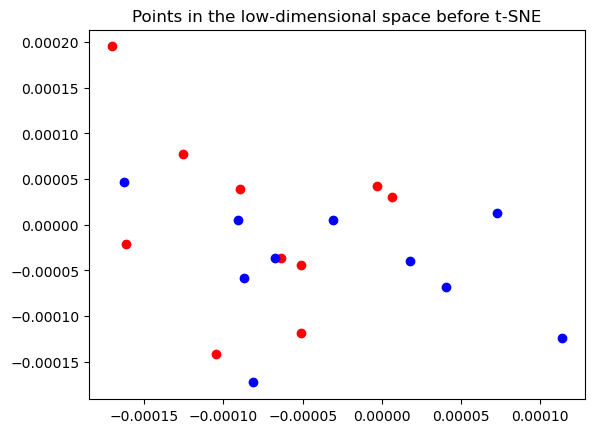

Initial KL divergence: 1.3957062312516166


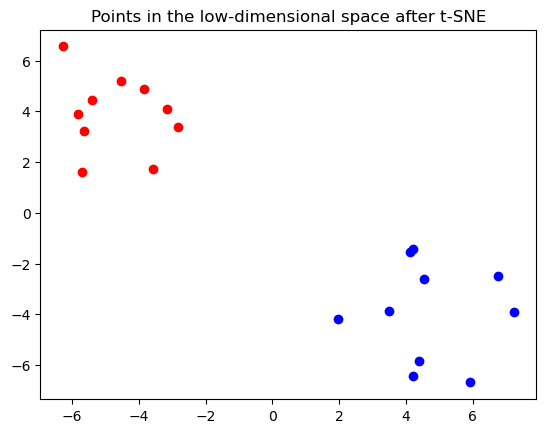

Final KL divergence: 0.4432219976439392


In [35]:
learning_rate = 50
alpha = 0.2
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

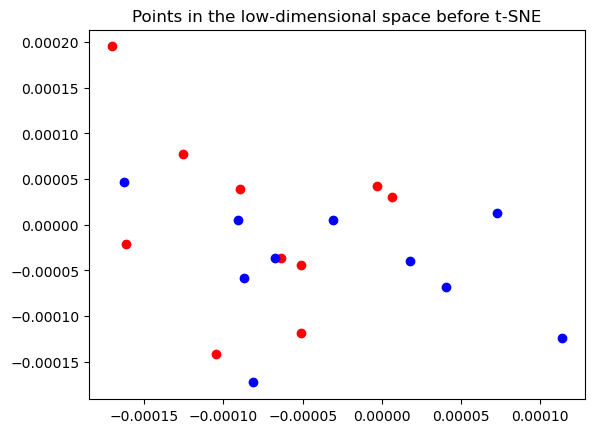

Initial KL divergence: 1.3957062312516166


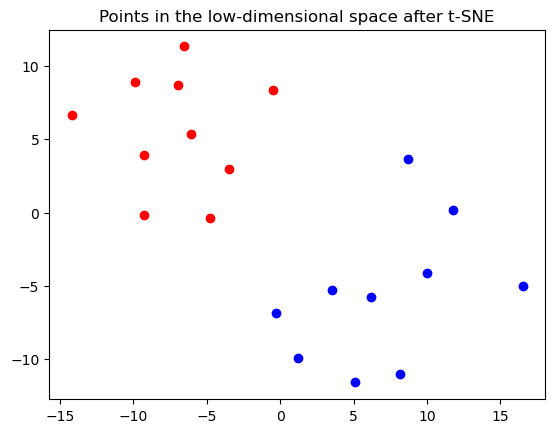

Final KL divergence: 0.613006027536069


In [36]:
learning_rate = 50
alpha = 0.5
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

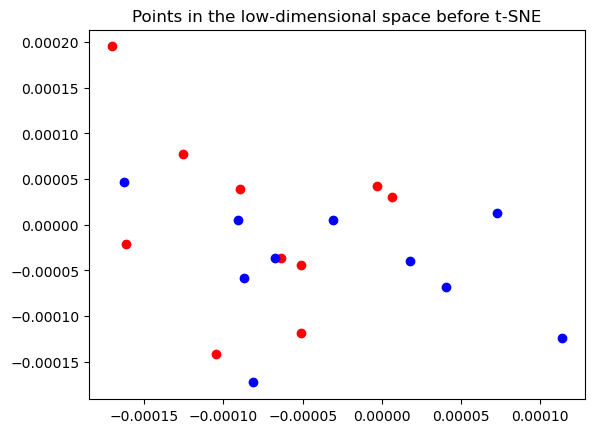

Initial KL divergence: 1.3957062312516166


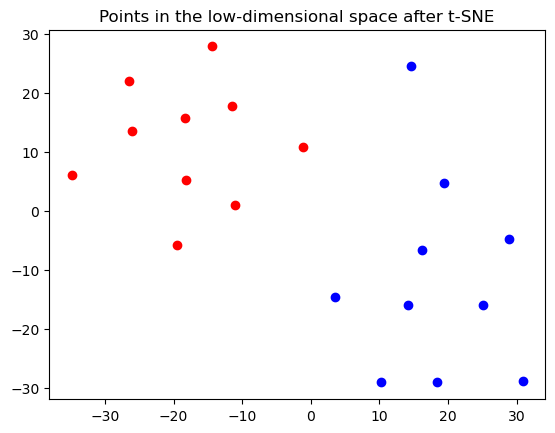

Final KL divergence: 0.6848460862678702


In [37]:
learning_rate = 50
alpha = 0.8
target_perplexity = 5
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

For lower values of alpha, the points are more clustered together. While for higher values of alpha, the points are more spread out. KL divergence is minimized for moderate values of alpha.

Passing variance as input instead of using perplexity to find the variance:

Effect of learning rate:

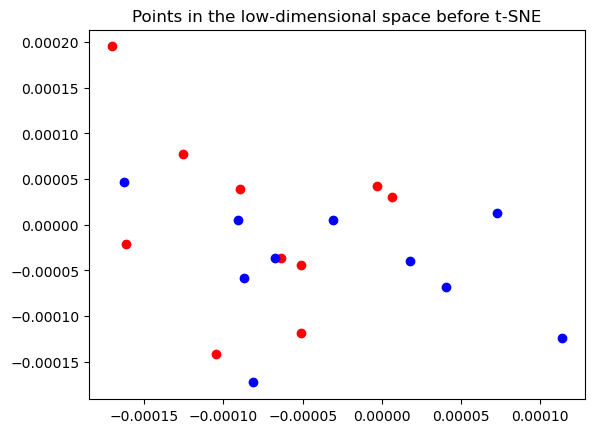

Initial KL divergence: 2.5215434852627467


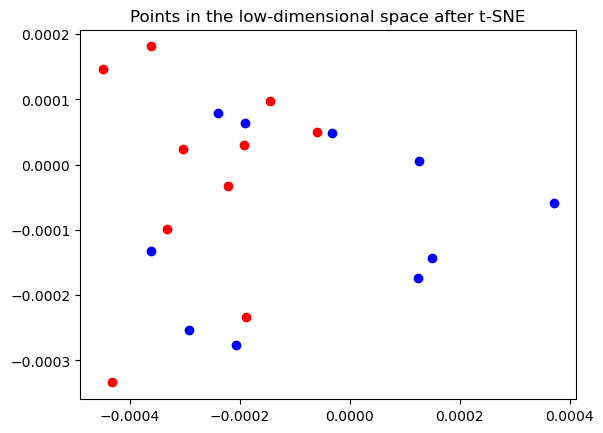

Final KL divergence: 2.5215434200499445


In [38]:
# use the fact that cov = 0.01 * I, taking sigma = 0.1 for all points
sigmas = np.ones(2*n) * 0.1
learning_rate = 0.01
alpha = 0.5
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

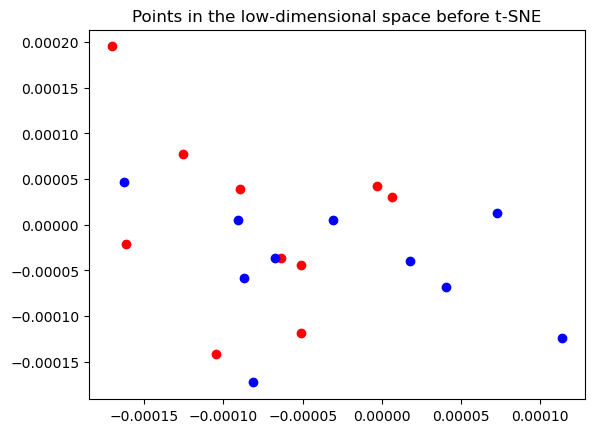

Initial KL divergence: 2.5215434852627467


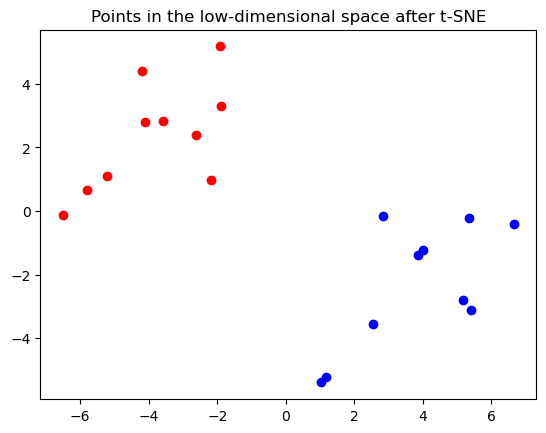

Final KL divergence: 0.5937522891169852


In [39]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 10
alpha = 0.5
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

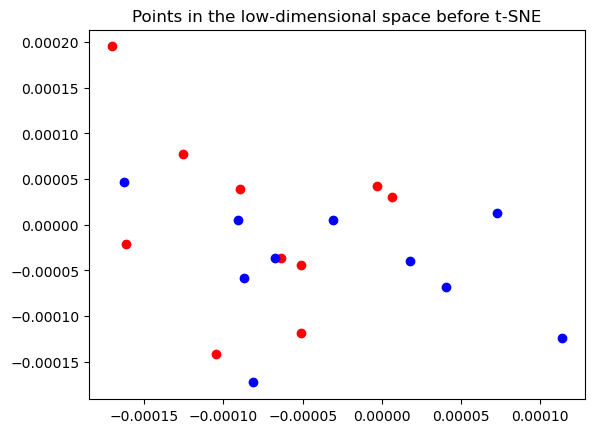

Initial KL divergence: 2.5215434852627467


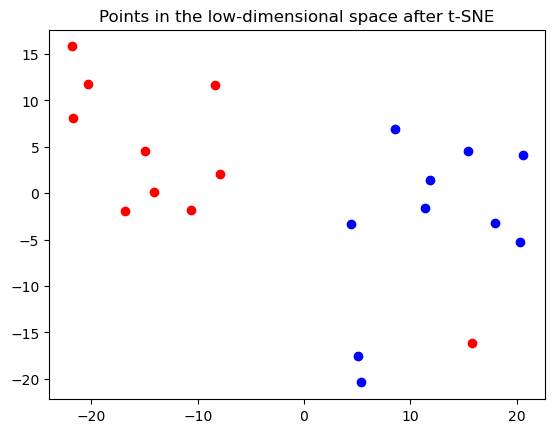

Final KL divergence: 0.7542057706938571


In [40]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 50
alpha = 0.5
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

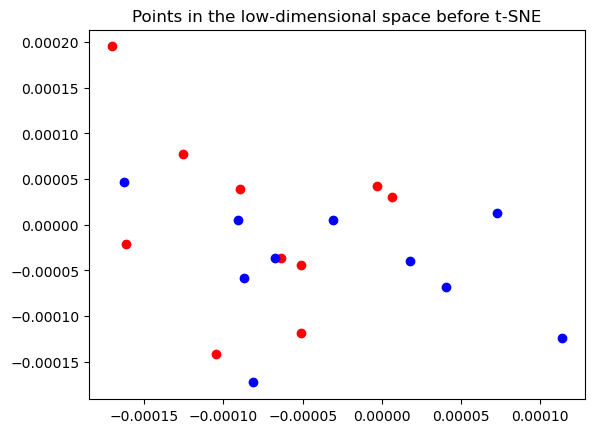

Initial KL divergence: 2.5215434852627467


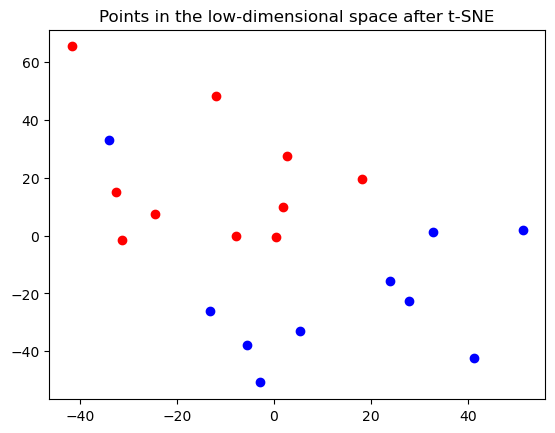

Final KL divergence: 2.042336992508192


In [41]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 100
alpha = 0.5
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

Effect of alpha:

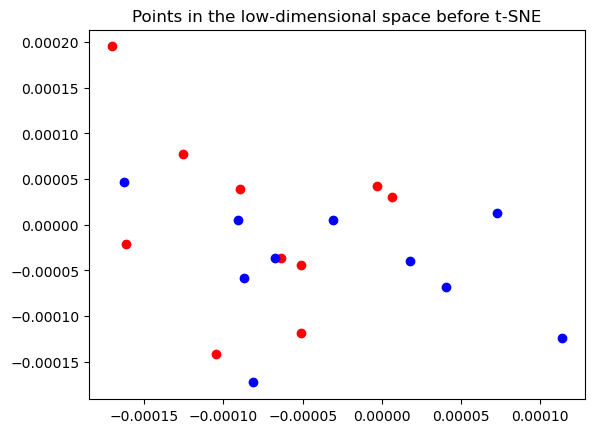

Initial KL divergence: 2.5215434852627467


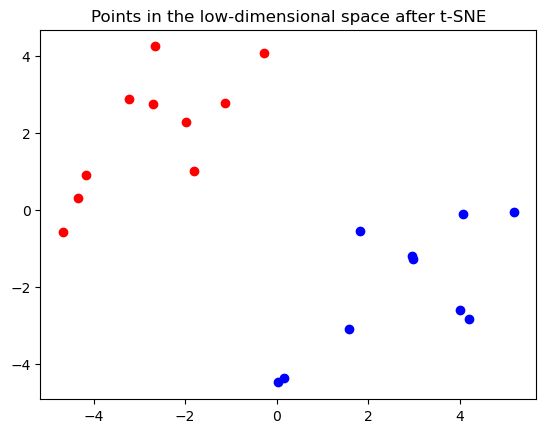

Final KL divergence: 0.6736707794084458


In [42]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 10
alpha = 0.05
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

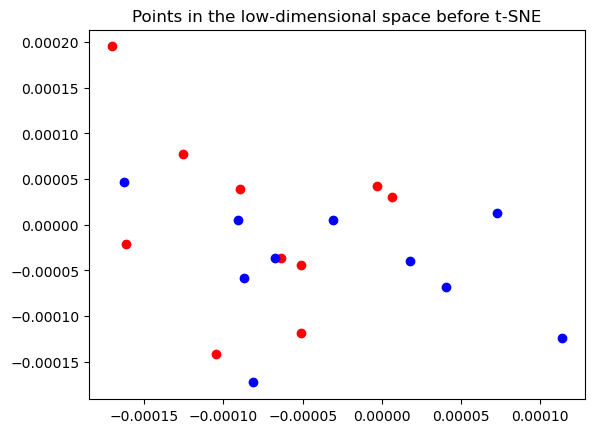

Initial KL divergence: 2.5215434852627467


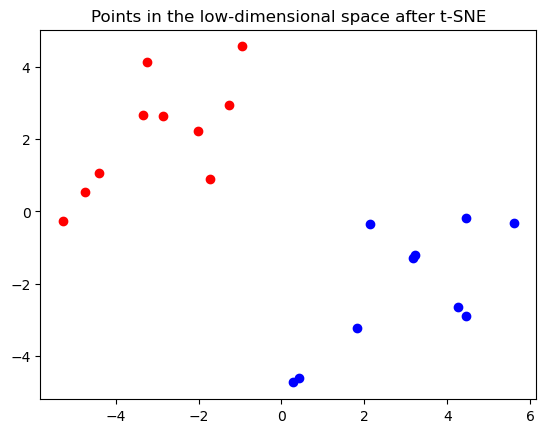

Final KL divergence: 0.6458127443780475


In [43]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 10
alpha = 0.2
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

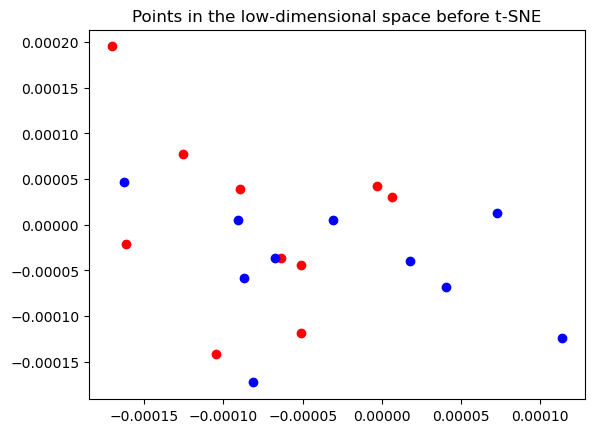

Initial KL divergence: 2.5215434852627467


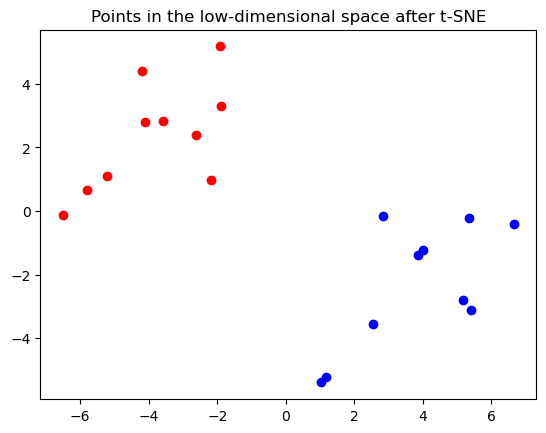

Final KL divergence: 0.5937522891169852


In [44]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 10
alpha = 0.5
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

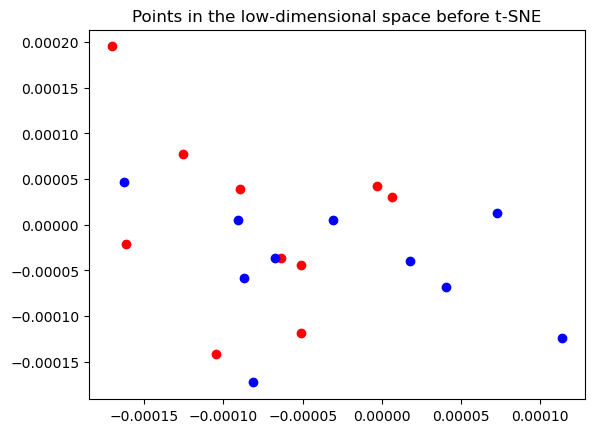

Initial KL divergence: 2.5215434852627467


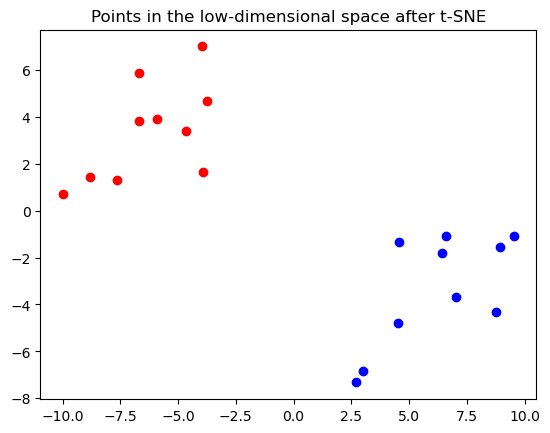

Final KL divergence: 0.5162468006244512


In [45]:
sigmas = np.ones(2*n) * 0.1
learning_rate = 10
alpha = 0.8
Y = tSNE(X, low_dim, T, learning_rate, alpha, sigmas=sigmas)

Similar results are obtained when passing variance as input instead of using perplexity to find the variance.  
Also, the KL divergence is minimized for moderate values of learning rate while it seems to be unaffected by alpha when passing variance as input.

c)

Comparison with sklearn's t-SNE:

In [46]:
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

For perplexity = 5:

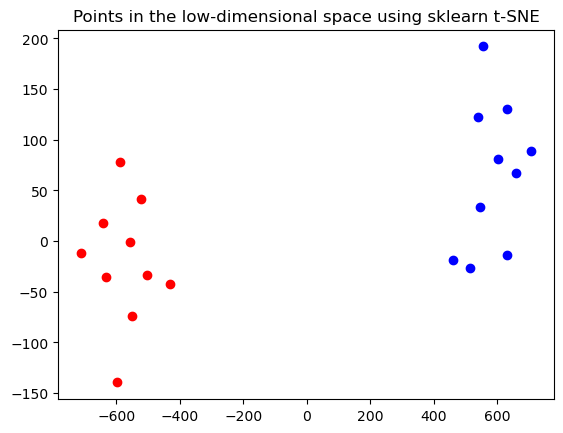

Using Custom t-SNE:


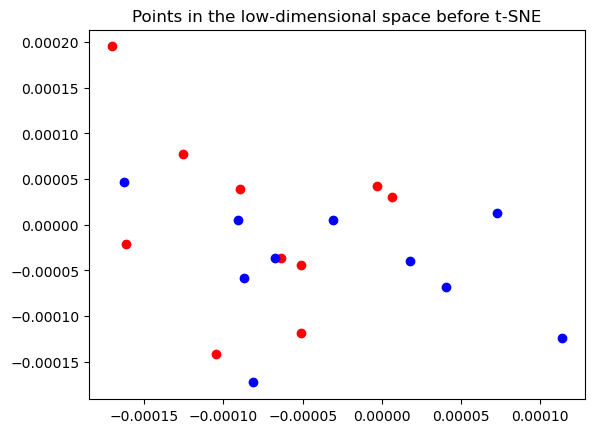

Initial KL divergence: 1.3957062312516166


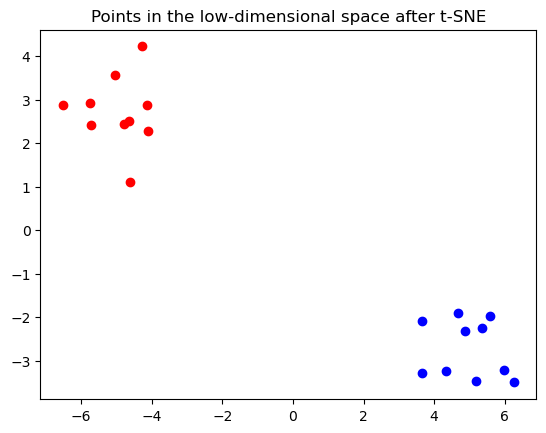

Final KL divergence: 0.11944552351627537


In [47]:
target_perplexity = 5
sklearn_tsne = TSNE(n_components=2, perplexity=target_perplexity)
Y_sklearn = sklearn_tsne.fit_transform(X)
plot_points(Y_sklearn, 'Points in the low-dimensional space using sklearn t-SNE')
print("Using Custom t-SNE:")
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

For perplexity = 15:

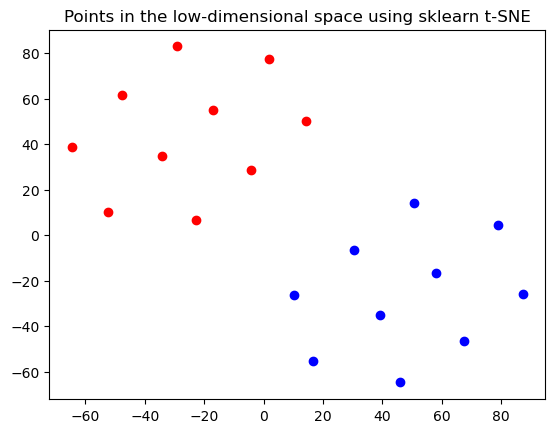

Using Custom t-SNE:


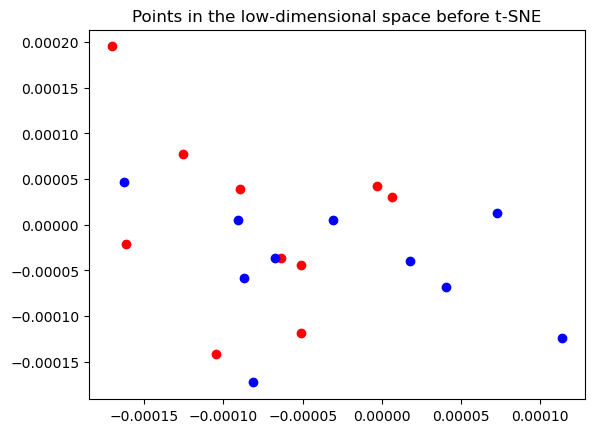

Initial KL divergence: 0.3575891254977425


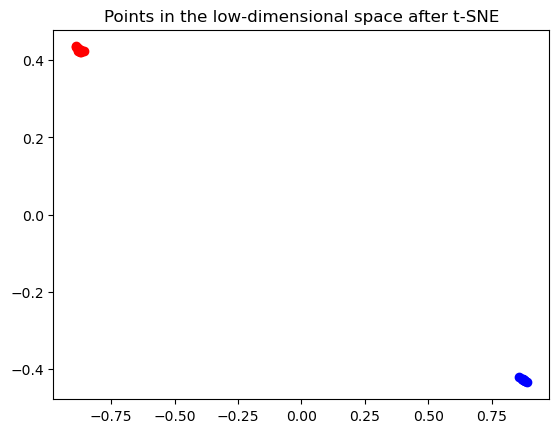

Final KL divergence: 7.685091929211777e-05


In [48]:
target_perplexity = 15
sklearn_tsne = TSNE(n_components=2, perplexity=target_perplexity)
Y_sklearn = sklearn_tsne.fit_transform(X)
plot_points(Y_sklearn, 'Points in the low-dimensional space using sklearn t-SNE')
print("Using Custom t-SNE:")
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

For perplexity = 30:

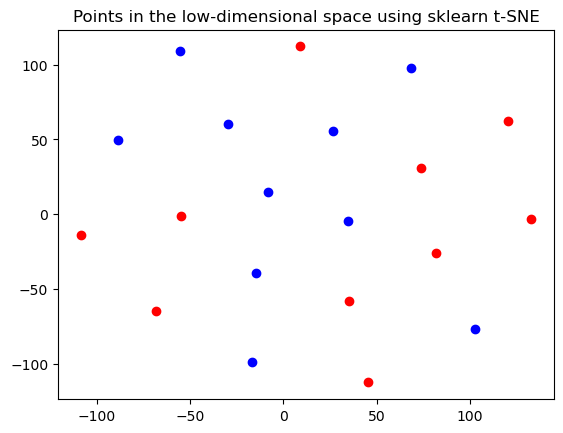

Using Custom t-SNE:


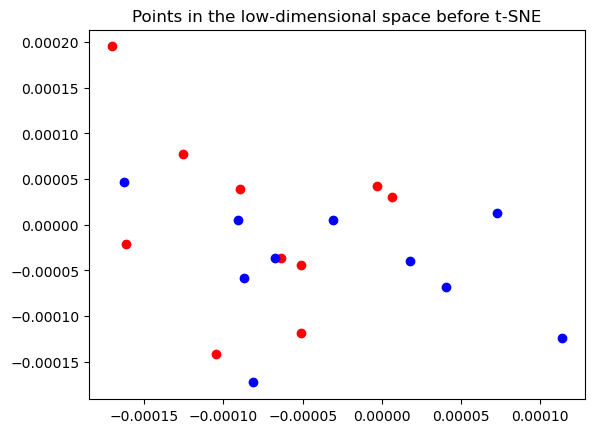

Initial KL divergence: 2.9524492748097916e-08


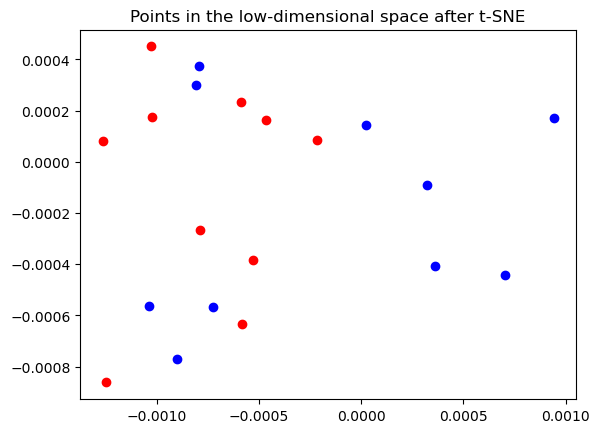

Final KL divergence: 2.9490429464776086e-08


In [49]:
target_perplexity = 30
sklearn_tsne = TSNE(n_components=2, perplexity=target_perplexity)
Y_sklearn = sklearn_tsne.fit_transform(X)
plot_points(Y_sklearn, 'Points in the low-dimensional space using sklearn t-SNE')
print("Using Custom t-SNE:")
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

For perplexity = 50:

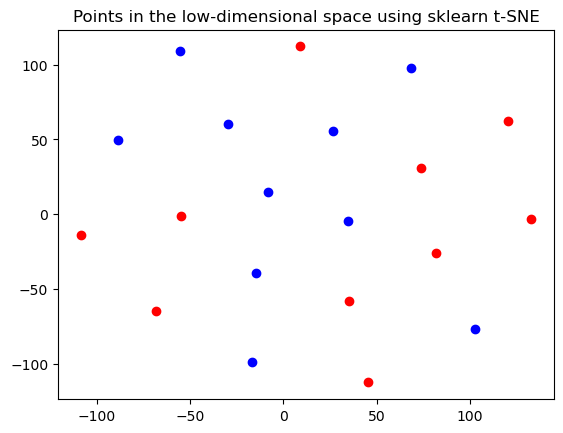

Using Custom t-SNE:


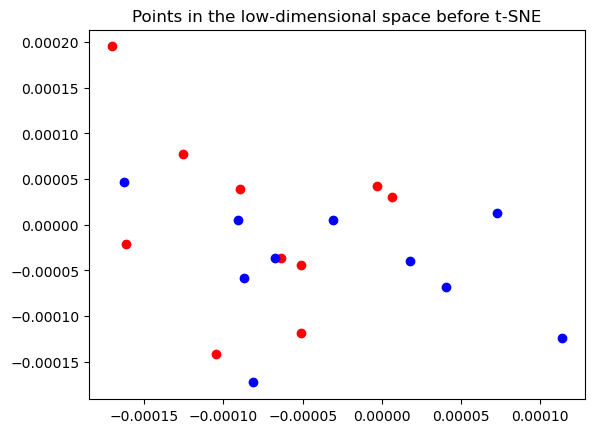

Initial KL divergence: 2.9524492748097916e-08


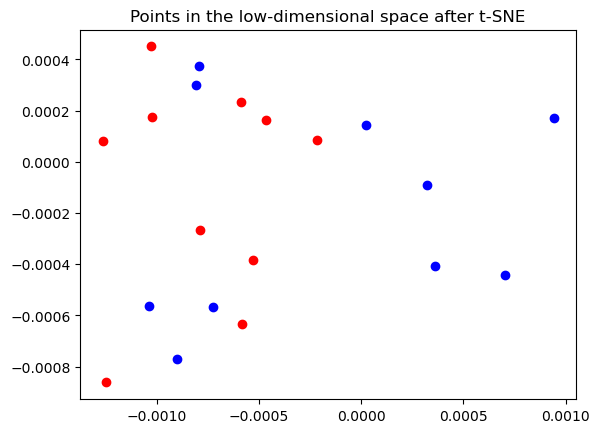

Final KL divergence: 2.9490429464776086e-08


In [50]:
target_perplexity = 50
sklearn_tsne = TSNE(n_components=2, perplexity=target_perplexity)
Y_sklearn = sklearn_tsne.fit_transform(X)
plot_points(Y_sklearn, 'Points in the low-dimensional space using sklearn t-SNE')
print("Using Custom t-SNE:")
Y = tSNE(X, low_dim, T, learning_rate, alpha, target_perplexity)

Sklearn's t-SNE gives similar results to the custom implementation. However, for perplexity = 15, the points are clustered very close together by custom implementation. For smaller perplexity values, the clusters are better separated. For larger perplexity values, the clusters mixed.